# WeatherPy
----

In [1]:
# Dependencies and Setup
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city_data.csv"

# Range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
city_names = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 1
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#         date.append(response["dt"])

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%m-%d-%Y')
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 1 : kapaa
Processing Record 3 of Set 1 : albany
Processing Record 4 of Set 1 : anloga
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : busselton
Processing Record 7 of Set 1 : tasiilaq
City not found. Skipping...
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : kavieng
Processing Record 10 of Set 1 : bengkulu
Processing Record 11 of Set 1 : todos santos
Processing Record 12 of Set 1 : ilulissat
Processing Record 13 of Set 1 : puerto ayora
Processing Record 14 of Set 1 : fortuna
Processing Record 15 of Set 1 : longyearbyen
Processing Record 16 of Set 1 : hobart
Processing Record 17 of Set 1 : hilo
Processing Record 18 of Set 1 : kruisfontein
Processing Record 19 of Set 1 : hithadhoo
Processing Record 20 of Set 1 : lorengau
Processing Record 21 of Set 1 : aklavik
Processing Record 22 of Set 1 : qaanaaq
Processing Record 23 of Set 1 : waipawa
Processing Record 24 of S

Processing Record 35 of Set 4 : radis
Processing Record 36 of Set 4 : juegang
Processing Record 37 of Set 4 : tiksi
Processing Record 38 of Set 4 : norman wells
Processing Record 39 of Set 4 : kashi
Processing Record 40 of Set 4 : saint-joseph
Processing Record 41 of Set 4 : atuona
Processing Record 42 of Set 4 : goderich
Processing Record 43 of Set 4 : rio verde de mato grosso
Processing Record 44 of Set 4 : dire dawa
Processing Record 45 of Set 4 : kemijarvi
Processing Record 46 of Set 4 : tiarei
Processing Record 47 of Set 4 : portland
Processing Record 48 of Set 4 : turkan
Processing Record 49 of Set 4 : asau
Processing Record 50 of Set 4 : kandrian
Processing Record 0 of Set 5 : boende
Processing Record 1 of Set 5 : saint-pierre
Processing Record 2 of Set 5 : ujjain
Processing Record 3 of Set 5 : upernavik
Processing Record 4 of Set 5 : olinda
City not found. Skipping...
Processing Record 5 of Set 5 : morehead
City not found. Skipping...
Processing Record 6 of Set 5 : fukue
Proces

Processing Record 18 of Set 8 : arrifes
Processing Record 19 of Set 8 : axim
Processing Record 20 of Set 8 : saskylakh
Processing Record 21 of Set 8 : south lake tahoe
Processing Record 22 of Set 8 : cacador
Processing Record 23 of Set 8 : matara
Processing Record 24 of Set 8 : tokur
City not found. Skipping...
City not found. Skipping...
Processing Record 25 of Set 8 : mukhen
Processing Record 26 of Set 8 : san andres
Processing Record 27 of Set 8 : sioux lookout
City not found. Skipping...
Processing Record 28 of Set 8 : lucea
Processing Record 29 of Set 8 : gwadar
Processing Record 30 of Set 8 : banes
Processing Record 31 of Set 8 : inhambane
Processing Record 32 of Set 8 : puerto escondido
Processing Record 33 of Set 8 : tarakan
City not found. Skipping...
Processing Record 34 of Set 8 : severomuysk
Processing Record 35 of Set 8 : cairns
Processing Record 36 of Set 8 : kahului
City not found. Skipping...
Processing Record 37 of Set 8 : tessalit
Processing Record 38 of Set 8 : ambul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": city_names,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.72,71,20,1.99,US,05-18-2021
1,Albany,42.6001,-73.9662,77.58,27,66,9.98,US,05-18-2021
2,Anloga,5.7947,0.8973,84.40,73,83,12.33,GH,05-18-2021
3,Vaini,-21.2000,-175.2000,75.36,94,75,5.75,TO,05-18-2021
4,Busselton,-33.6500,115.3333,57.09,85,0,4.34,AU,05-18-2021


In [6]:
# How many entries were returned?
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [7]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,18.588602,17.111857,67.256004,66.250460,57.937385,7.718435
std,33.194702,91.911559,18.271363,21.994378,38.966725,5.146966
min,-54.800000,-175.200000,12.740000,5.000000,0.000000,0.000000
25%,-8.832700,-65.834950,57.975000,53.000000,20.000000,3.785000
50%,21.283300,21.548200,71.330000,70.000000,73.000000,6.890000
75%,45.492300,99.557300,80.210000,82.000000,97.000000,10.120000
max,78.218600,179.316700,110.680000,100.000000,100.000000,26.730000


In [8]:
# Export the city data into a csv file
city_data_df.to_csv("../output_data/city_data.csv", index=False)

In [9]:
# Show Record Count
countforme = len(city_data_df)
countforme

543

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Calculate latest date (max) for plot titles
tstamp = city_data_df.Date.max()
tstamp

'05-18-2021'

#### Latitude vs. Temperature Plot

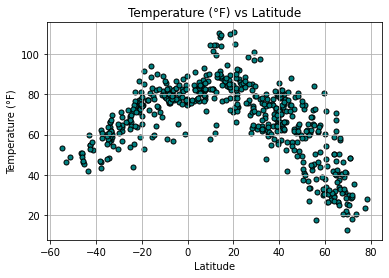

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude")

plt.savefig("../images/tempvlat.png")

# As latitude approaches 0, i.e. the equator, temperature increases

#### Latitude vs. Humidity Plot

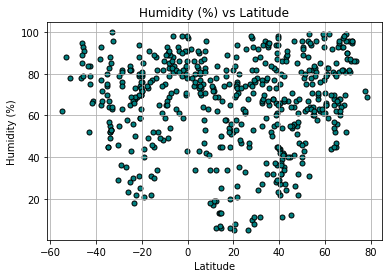

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

plt.savefig("../images/humvlat.png")

# There seems to be no relationship between humidity and latitude

#### Latitude vs. Cloudiness Plot

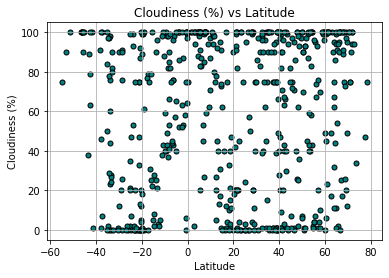

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude")

plt.savefig("../images/cloudvlat.png")

# There seems to be no relationship between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

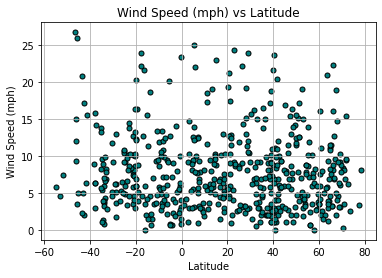

In [14]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude")

plt.savefig("../images/windvlat.png")

# There seems to be no relationship between wind speed and latitude

## Linear Regression

In [15]:
# Locate cities above or equal to 0 latitude and below 0 latitude
northern_cities = city_data_df[city_data_df.loc[:, "Lat"] >= 0]
southern_cities = city_data_df[city_data_df.loc[:, "Lat"] < 0]

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]
southlat_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

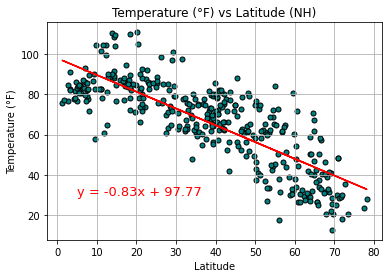

In [17]:
# Plot Temperature (°F) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Max Temp"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatnh.png")

In [18]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

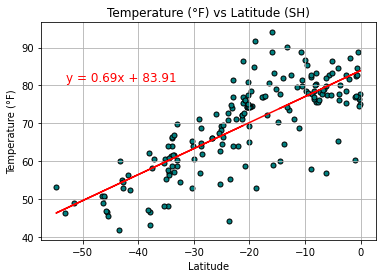

In [19]:
# Plot Temperature (°F) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Max Temp"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-53,81),fontsize=12,color="red")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatsh.png")

In [20]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

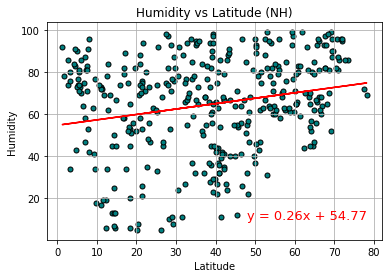

In [21]:
# Plot Humidity vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Humidity"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(48,10),fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northernhumvlat.png")

In [22]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

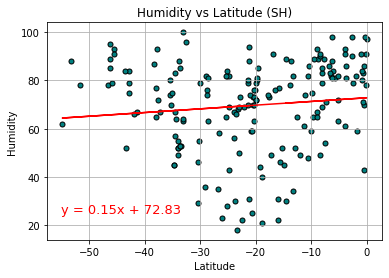

In [23]:
# Plot Humidity vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Humidity"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,25), fontsize=13,color="red")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/sourthernhumvlat.png")

In [24]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

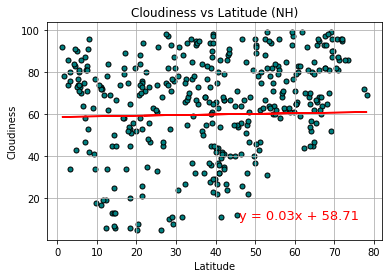

In [25]:
# Plot Cloudiness vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Cloudiness"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(46,10), fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northerncloudvlat.png")

In [26]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

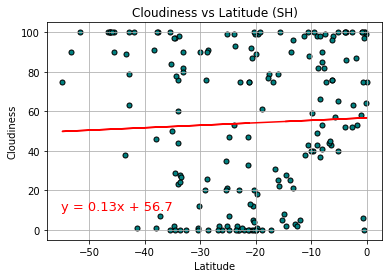

In [27]:
# Plot Cloudiness vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Cloudiness"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,10),fontsize=13,color="red")
plt.plot(southern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/southerncloudvlat')

In [28]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

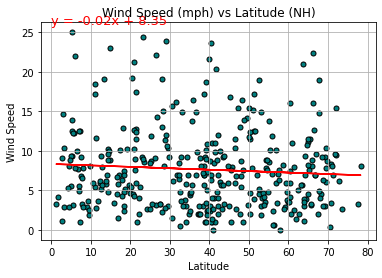

In [29]:
# Plot Wind Speed (mph) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Wind Speed"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(0,26),fontsize=13,color="red")
plt.plot(northern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/northernwindvlat')

In [30]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

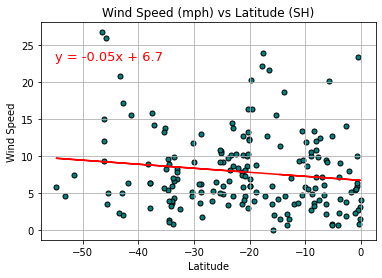

In [31]:
# Plot Wind Speed (mph) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Wind Speed"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,23),fontsize=13,color="red")
plt.plot(southern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/southernwindvlat')

In [32]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.
